<a href="https://colab.research.google.com/github/Elvillano3005/primerproyecto/blob/main/NelderMead_actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Función Rosenbrock

## $f(\vec{x}) = \sum_{i=1}^{n-1}[ 100(x_{i+i} - x_i^2)^2+(1-x_i)^2]$

In [ ]:
def rosenbrock(x: np.ndarray) -> float:
    return np.sum( 100*(x[1:]-x[:-1]**2)**2+(1-x[:-1])**2 )
rosenbrock(np.array([1, 1]))

np.int64(0)

## Funciones para hacer las gráficas en 3D y Contorno

In [ ]:
def meshdata(x_min, x_max, y_min, y_max, function, n_puntos=200):
    # Crear una malla de puntos para x e y
    x_vals = np.linspace(x_min, x_max, n_puntos)
    y_vals = np.linspace(y_min, y_max, n_puntos)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Evaluar la función en la malla
    Z = np.array([function(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = Z.reshape(X.shape)
    return X, Y, Z

def plot3d(X, Y, Z):
    # Crear la figura y los ejes 3D directamente
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Gráfico 3D
    surface = ax.plot_surface(X, Y, Z, edgecolor='none', cmap='viridis')
    ax.set_title('Función en 3D')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')

    plt.tight_layout()

    # Devolver fig y ax para poder modificar después
    return fig, ax

def plotContour(X, Y, Z):
    # Crear la figura y los ejes directamente
    fig, ax = plt.subplots()

    # Gráfico de contorno
    contour = ax.contourf(X, Y, Z, levels=10, cmap='viridis')
    fig.colorbar(contour, ax=ax)
    ax.set_title('Contornos de la función')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.tight_layout()

    # Devolver fig y ax para poder añadir puntos después
    return fig, ax

In [ ]:
X, Y, Z = meshdata(-2, 2, -1, 3, rosenbrock)
plot3d(X, Y, Z)
plotContour(X, Y, Z)

## Creacion del Simplex

In [ ]:
def createSimplex(x0: np.ndarray, alpha:float, N):
    delta1 = ( (np.sqrt(N+1) + N - 1)/N*np.sqrt(2) )*alpha
    delta2 = ( (np.sqrt(N+1) - 1)/N*np.sqrt(2) )*alpha

    xn = [ np.array([x0[i]+delta1 if i==j else x0[i]+delta2 for i in range(0, N)]) for j in range(0, N) ]
    xn.insert(0, x0)
    return np.reshape(np.array(xn), (3, 2))

createSimplex(np.array([0,0]),1, 2)


array([[0.        , 0.        ],
       [1.93185165, 0.51763809],
       [0.51763809, 1.93185165]])

## Centro, Reflexion, Expansion, Contraccion, Termino

In [ ]:
centroide = lambda simplex, index_h, N: (np.sum(simplex, axis=0) - simplex[index_h])/N
reflexion = lambda xc, xh: 2*xc - xh
expansion = lambda xc, xh, gamma: (1+gamma)*xc - gamma*xh
contraccion1 = lambda xc, xh, beta: (1-beta)*xc + beta*xh
contraccion2 = lambda xc, xh, beta: (1+beta)*xc - beta*xh
terminar = lambda fx, fc, N, epsilon=0.001: np.sqrt(np.sum((fx - fc)**2) / (N + 1)) < epsilon

# Algoritmo Nelder-Mead (Simplex)

Text(0.5, 1.0, 'Trayectoria del punto mínimo (Nelder-Mead)')

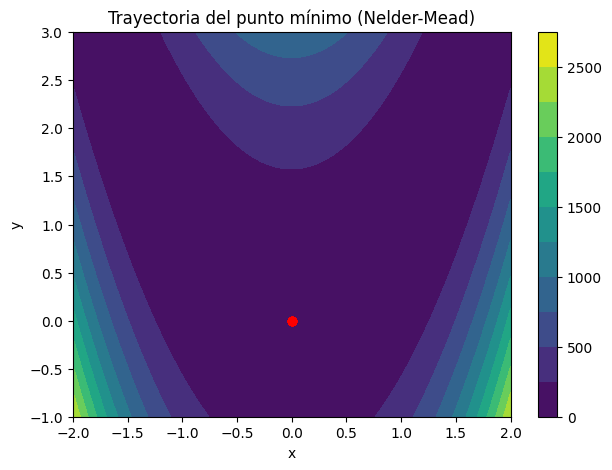

In [ ]:
N = 2
gamma = 1.2
beta = 0.5
epsilon = 0.001
max_iter = 100

# Punto inicial
x0 = np.array([0, 0])
simplex = createSimplex(x0, 1, N)

# Almacena los caminos del mejor punto
trayectoria = []


for i in range(max_iter):
    fx = [rosenbrock(x) for x in simplex]
    indices = np.argsort(fx)
    i_x1 = indices[0]
    i_xh = indices[-1]
    i_xg = indices[-2]

    # Guardar mejor punto
    trayectoria.append(simplex[i_x1])

    # parada
    if terminar(np.array(fx), fx[i_x1], N, epsilon):
        break

    # Calcular centroid
    xc = centroide(simplex, i_xh, N)

    # Reflejar
    xr = reflexion(xc, simplex[i_xh])
    fr = rosenbrock(xr)

    if fr < fx[i_x1]:  # expansión
        xe = expansion(xc, simplex[i_xh], gamma)
        fe = rosenbrock(xe)
        if fe < fr:
            simplex[i_xh] = xe
        else:
            simplex[i_xh] = xr
    elif fx[i_x1] <= fr < fx[i_xg]:  #  reflexión
        simplex[i_xh] = xr
    else:  #  contracción
        if fr < fx[i_xh]:
            xc1 = contraccion1(xc, simplex[i_xh], beta)
            fc1 = rosenbrock(xc1)
            if fc1 < fr:
                simplex[i_xh] = xc1
            else:
                simplex[i_xh] = simplex[i_x1]  # Reducción
        else:
            xc2 = contraccion2(xc, simplex[i_xh], beta)
            fc2 = rosenbrock(xc2)
            if fc2 < fx[i_xh]:
                simplex[i_xh] = xc2
            else:
                simplex[i_xh] = simplex[i_x1]  # Reducción

# Visualizar contornos
X, Y, Z = meshdata(-2, 2, -1, 3, rosenbrock)
fig, ax = plotContour(X, Y, Z)

# Mostrar puntos de la trayectoria
trayectoria = np.array(trayectoria)
ax.plot(trayectoria[:,0], trayectoria[:,1], color='red', marker='o', linestyle='--')
ax.set_title('Trayectoria del punto mínimo (Nelder-Mead)')